In [71]:
# based on https://medium.com/@erikhallstrm/hello-world-rnn-83cd7105b767

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 100
total_series_length = 5000 #50000
echo_step = 3
batch_size = 5
truncated_backprop_length = 15
state_size = 4
num_classes = 2 # output is 0 or 1

num_batches = total_series_length//batch_size//truncated_backprop_length
print(num_batches)

66


In [72]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))
    y = y.reshape((batch_size, -1))

    return (x, y)

(x, y) = generateData()
print(x[:,:20])

[[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1]
 [0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0]
 [1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0]
 [1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0]]


In [73]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

print(batchX_placeholder.shape)

(5, 15)


In [74]:
#print(np.random.rand(state_size+1, state_size))
#print(np.random.rand(state_size, num_classes))

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

In [75]:
inputs_series = tf.unstack(batchX_placeholder, axis=1)  # returns a list of 15 tensors
labels_series = tf.unstack(batchY_placeholder, axis=1)

print(type(inputs_series))
print(len(inputs_series))
print(inputs_series[0].shape)

<class 'list'>
15
(5,)


In [76]:
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

In [77]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] # Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) 
          for logits, labels in zip(logits_series, labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [78]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for 
                                         out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

New data, epoch 0
Step 0 Loss 0.6961694


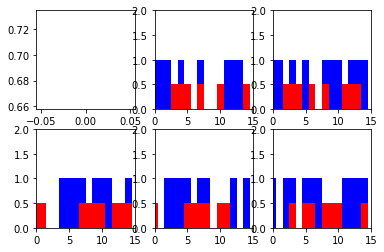

New data, epoch 1
Step 0 Loss 0.6923122


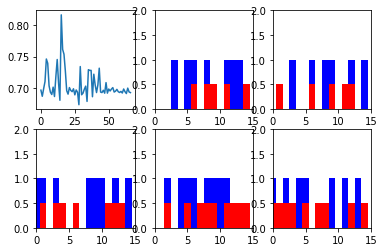

New data, epoch 2
Step 0 Loss 0.6858596


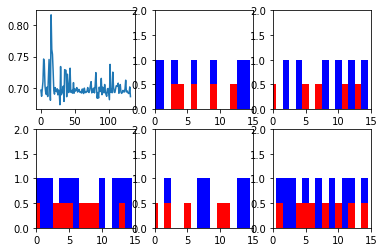

New data, epoch 3
Step 0 Loss 0.69331634


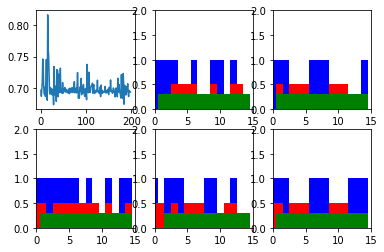

New data, epoch 4
Step 0 Loss 0.69347656


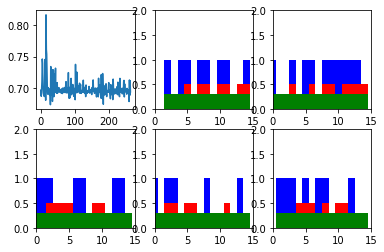

New data, epoch 5
Step 0 Loss 0.6855434


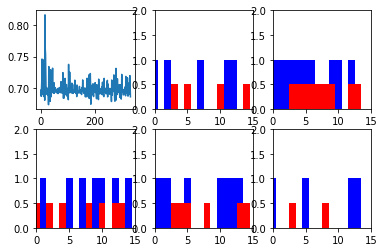

New data, epoch 6
Step 0 Loss 0.69390225


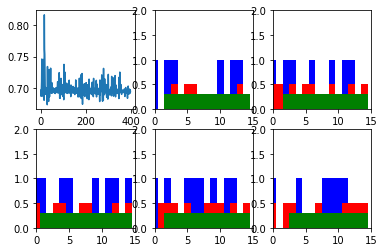

New data, epoch 7
Step 0 Loss 0.692408


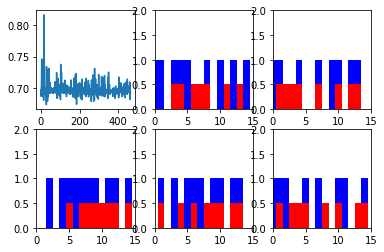

New data, epoch 8
Step 0 Loss 0.685388


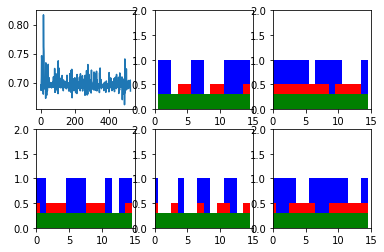

New data, epoch 9
Step 0 Loss 0.6899635


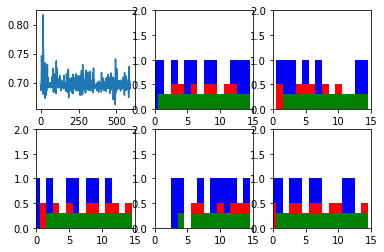

New data, epoch 10
Step 0 Loss 0.6980779


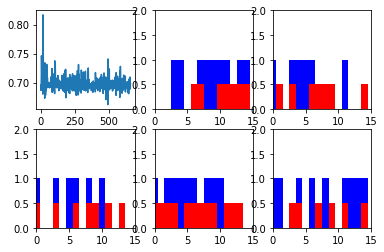

New data, epoch 11
Step 0 Loss 0.6956537


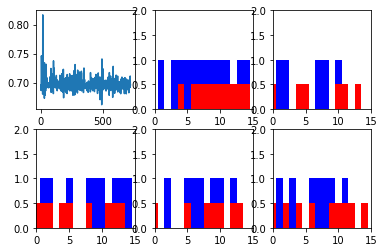

New data, epoch 12
Step 0 Loss 0.6951379


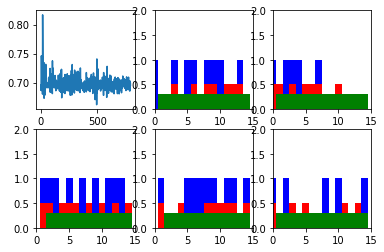

New data, epoch 13
Step 0 Loss 0.6944942


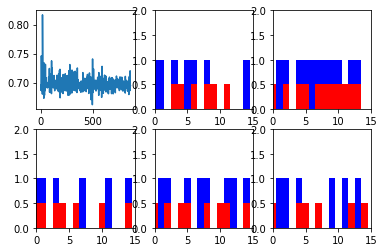

New data, epoch 14
Step 0 Loss 0.681025


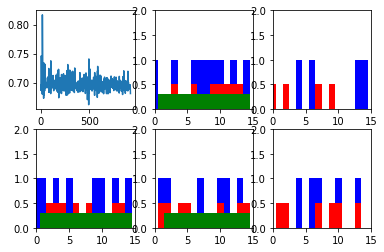

New data, epoch 15
Step 0 Loss 0.6898122


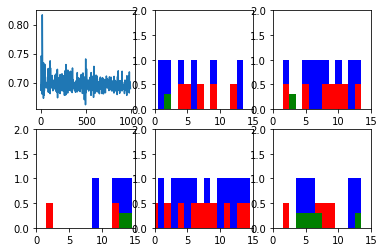

New data, epoch 16
Step 0 Loss 0.6781901


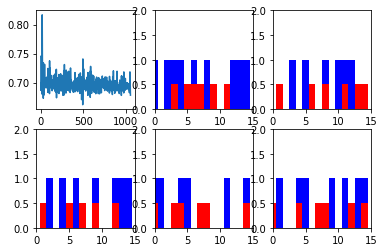

New data, epoch 17
Step 0 Loss 0.67943263


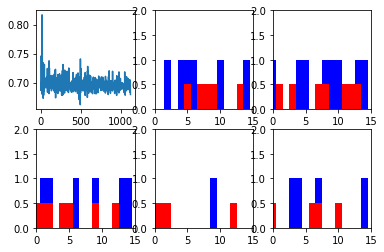

New data, epoch 18
Step 0 Loss 0.6934286


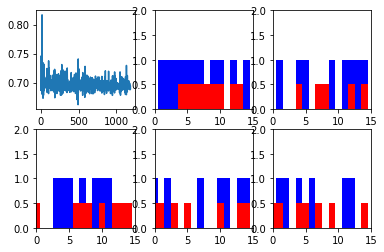

New data, epoch 19
Step 0 Loss 0.6945643


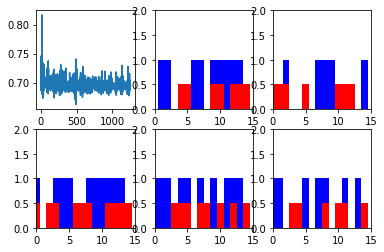

New data, epoch 20
Step 0 Loss 0.6884819


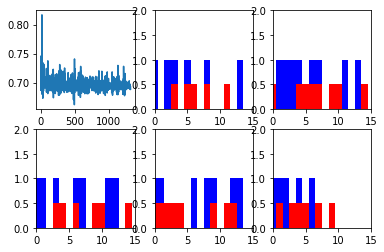

New data, epoch 21
Step 0 Loss 0.69447094


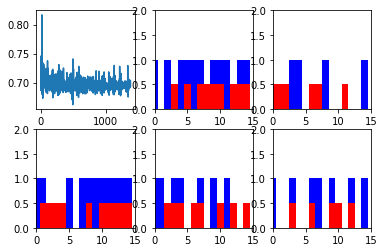

New data, epoch 22
Step 0 Loss 0.6773323


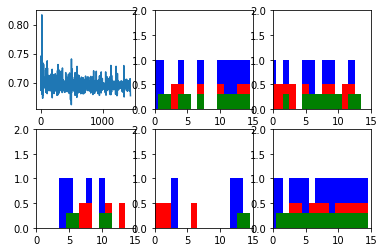

New data, epoch 23
Step 0 Loss 0.5651203


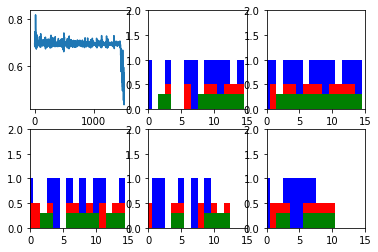

New data, epoch 24
Step 0 Loss 0.2690996


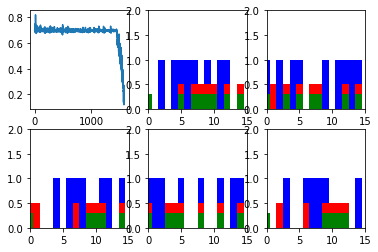

New data, epoch 25
Step 0 Loss 0.1809067


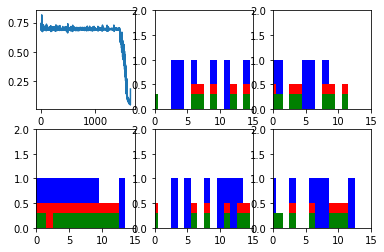

New data, epoch 26
Step 0 Loss 0.19996117


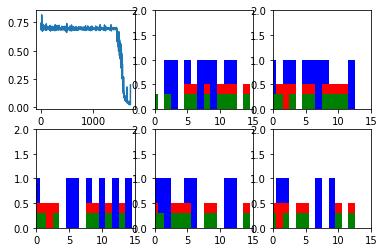

New data, epoch 27
Step 0 Loss 0.20592365


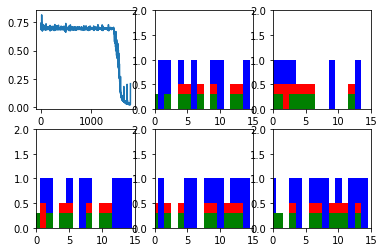

New data, epoch 28
Step 0 Loss 0.20436895


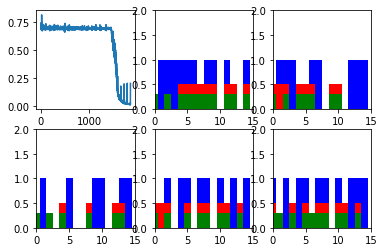

New data, epoch 29
Step 0 Loss 0.22950755


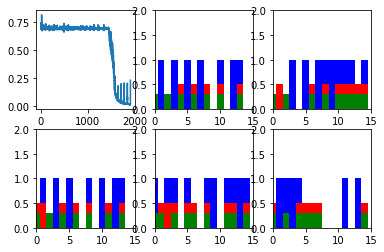

New data, epoch 30
Step 0 Loss 0.1459326


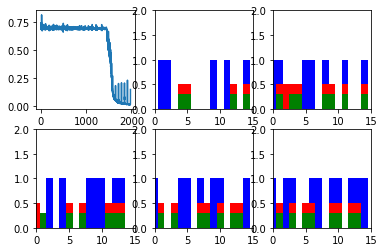

New data, epoch 31
Step 0 Loss 0.22669095


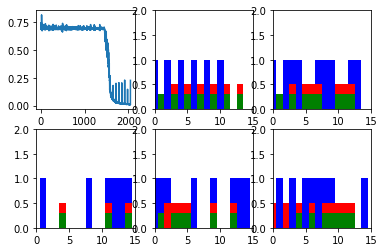

New data, epoch 32
Step 0 Loss 0.1528379


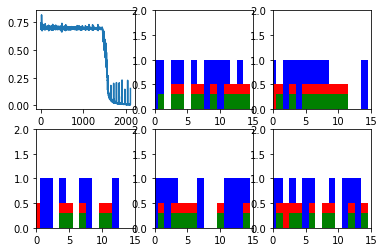

New data, epoch 33
Step 0 Loss 0.22291137


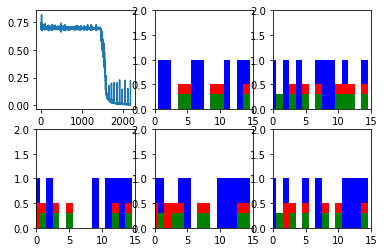

New data, epoch 34
Step 0 Loss 0.19266954


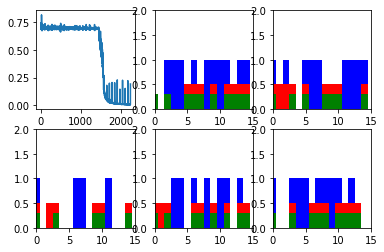

New data, epoch 35
Step 0 Loss 0.15937021


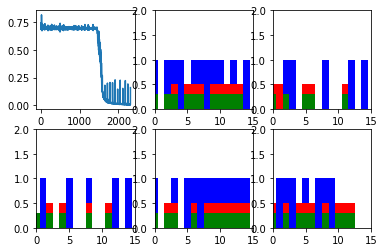

New data, epoch 36
Step 0 Loss 0.14737172


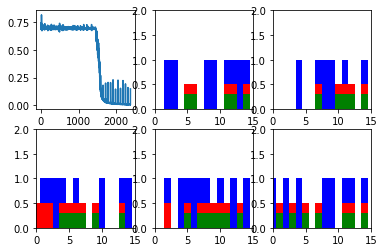

New data, epoch 37
Step 0 Loss 0.2573685


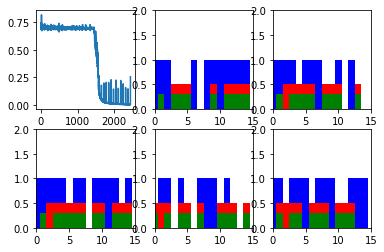

New data, epoch 38
Step 0 Loss 0.4057196


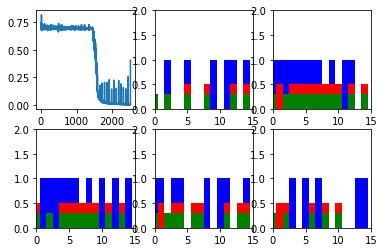

New data, epoch 39
Step 0 Loss 0.24045599


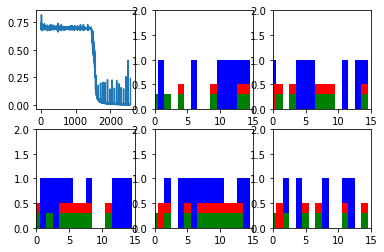

New data, epoch 40
Step 0 Loss 0.17875648


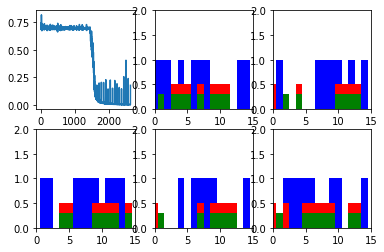

New data, epoch 41
Step 0 Loss 0.152039


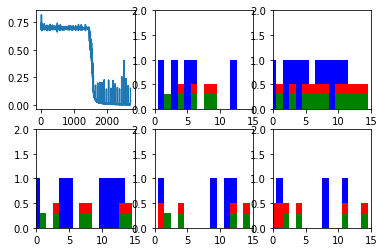

New data, epoch 42
Step 0 Loss 0.1682968


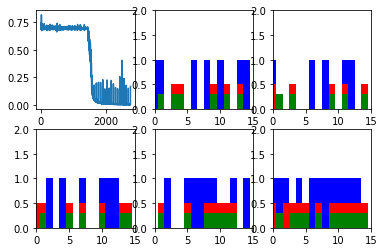

New data, epoch 43
Step 0 Loss 0.08836549


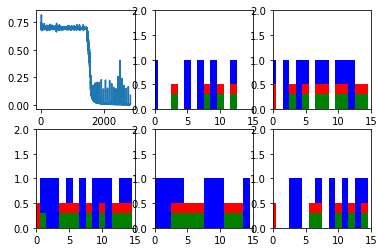

New data, epoch 44
Step 0 Loss 0.2943297


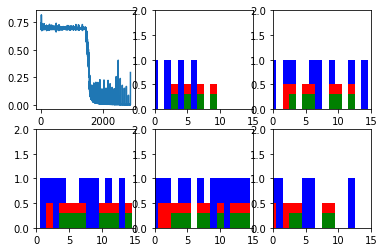

New data, epoch 45
Step 0 Loss 0.20683207


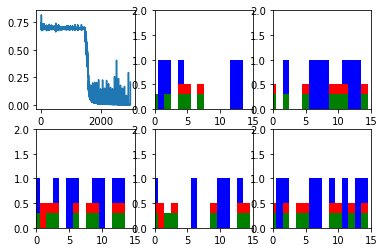

New data, epoch 46
Step 0 Loss 0.3174186


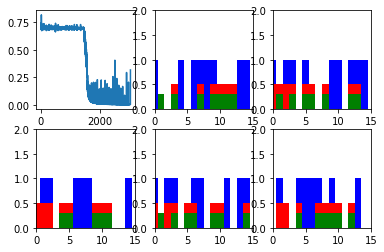

New data, epoch 47
Step 0 Loss 0.16492586


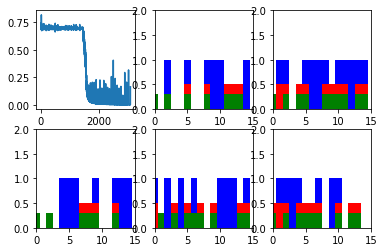

New data, epoch 48
Step 0 Loss 0.20033571


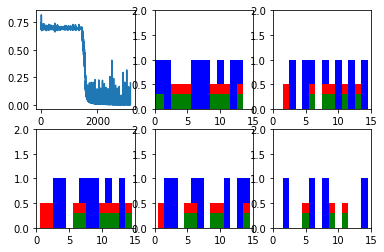

New data, epoch 49
Step 0 Loss 0.108341664


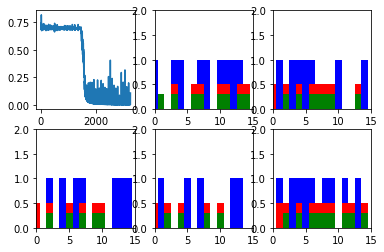

New data, epoch 50
Step 0 Loss 0.13053593


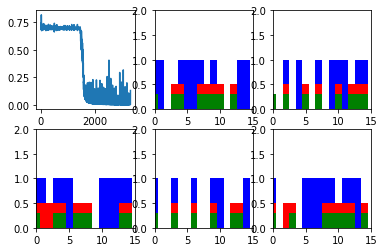

New data, epoch 51
Step 0 Loss 0.30259204


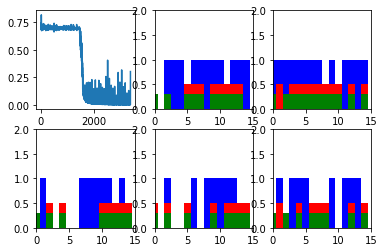

New data, epoch 52
Step 0 Loss 0.17730618


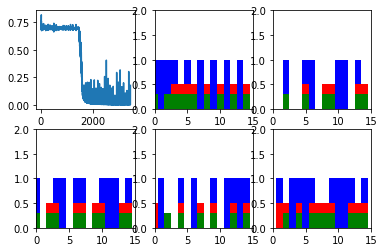

New data, epoch 53
Step 0 Loss 0.13002606


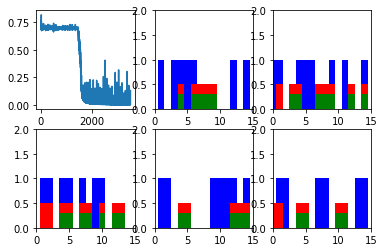

New data, epoch 54
Step 0 Loss 0.14519054


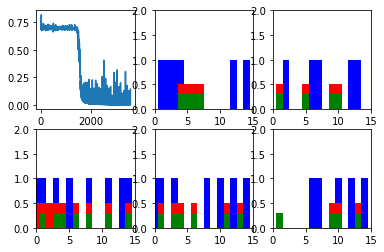

New data, epoch 55
Step 0 Loss 0.16098334


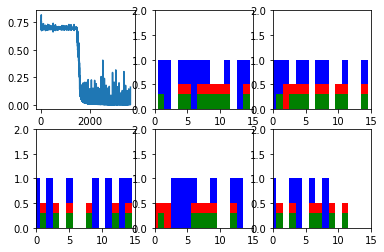

New data, epoch 56
Step 0 Loss 0.23179446


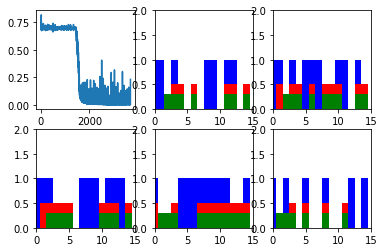

New data, epoch 57
Step 0 Loss 0.1352269


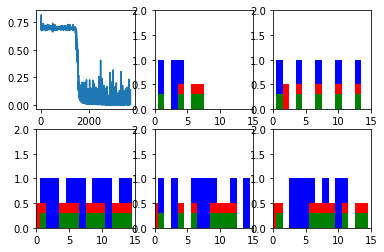

New data, epoch 58
Step 0 Loss 0.36919388


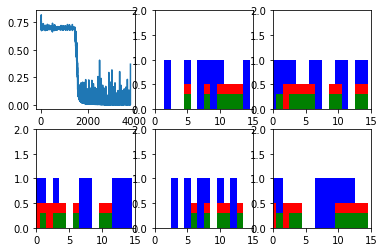

New data, epoch 59
Step 0 Loss 0.09471073


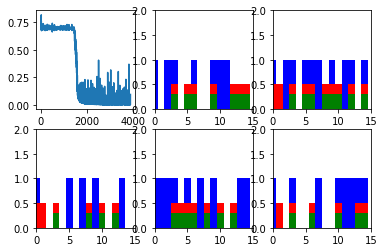

New data, epoch 60
Step 0 Loss 0.23697744


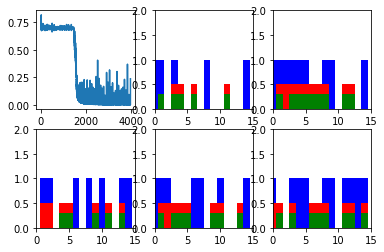

New data, epoch 61
Step 0 Loss 0.2690871


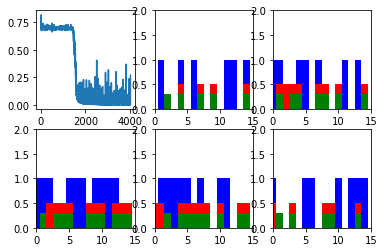

New data, epoch 62
Step 0 Loss 0.18641125


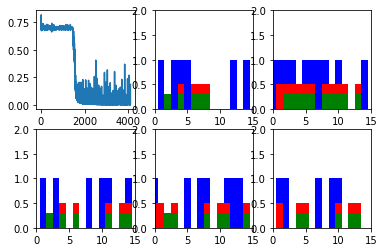

New data, epoch 63
Step 0 Loss 0.16567335


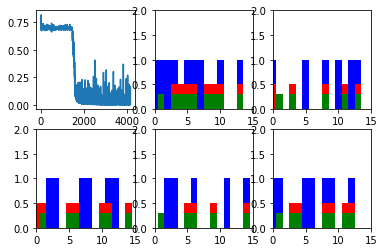

New data, epoch 64
Step 0 Loss 0.20290543


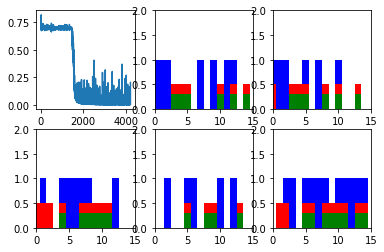

New data, epoch 65
Step 0 Loss 0.1350964


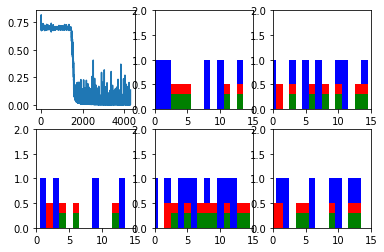

New data, epoch 66
Step 0 Loss 0.158031


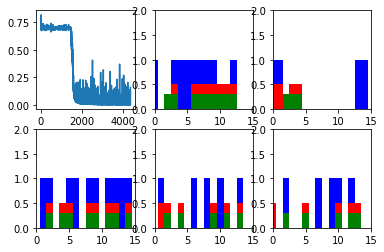

New data, epoch 67
Step 0 Loss 0.28216574


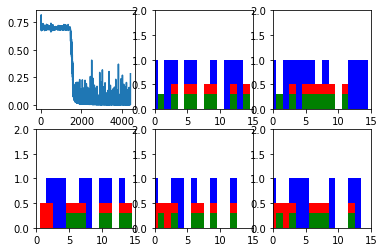

New data, epoch 68
Step 0 Loss 0.2117442


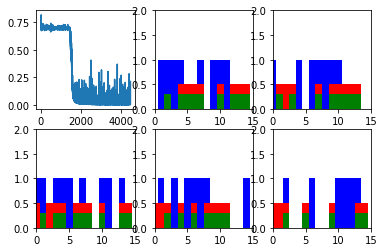

New data, epoch 69
Step 0 Loss 0.23038955


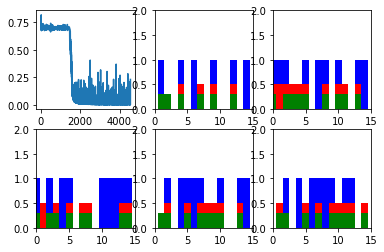

New data, epoch 70
Step 0 Loss 0.27441162


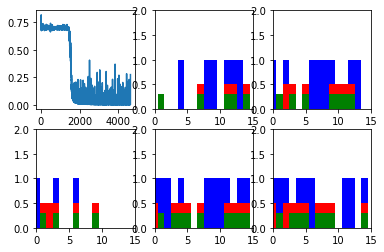

New data, epoch 71
Step 0 Loss 0.0868143


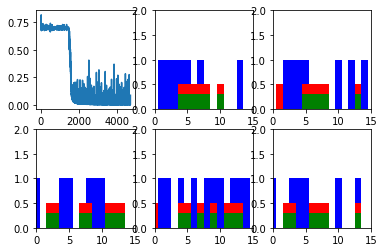

New data, epoch 72
Step 0 Loss 0.07530583


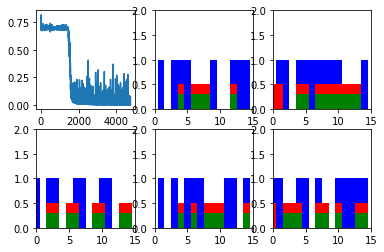

New data, epoch 73
Step 0 Loss 0.17553672


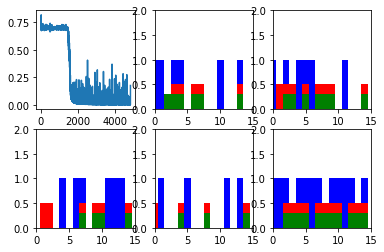

New data, epoch 74
Step 0 Loss 0.1559403


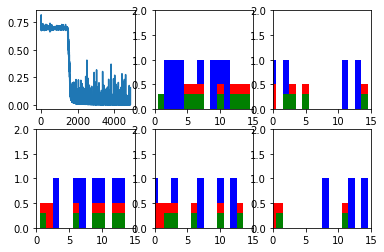

New data, epoch 75
Step 0 Loss 0.1737388


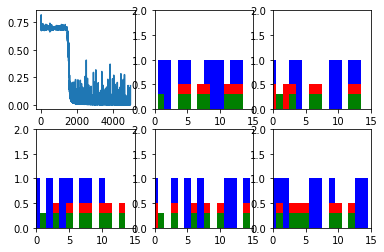

New data, epoch 76
Step 0 Loss 0.16744176


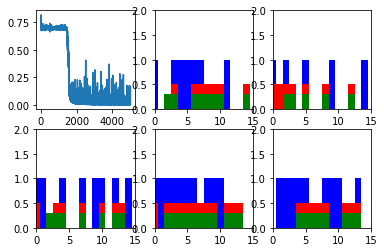

New data, epoch 77
Step 0 Loss 0.24887992


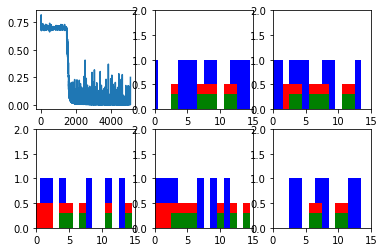

New data, epoch 78
Step 0 Loss 0.17519793


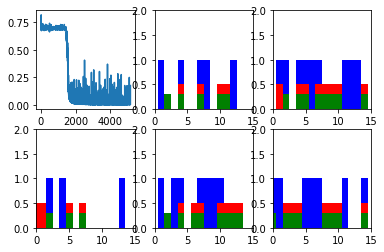

New data, epoch 79
Step 0 Loss 0.13014753


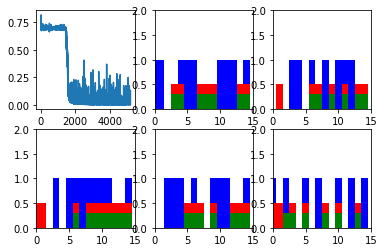

New data, epoch 80
Step 0 Loss 0.14802495


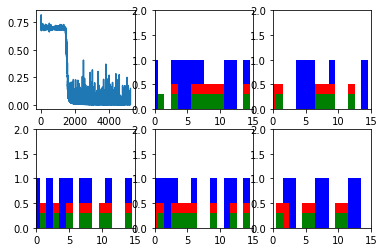

New data, epoch 81
Step 0 Loss 0.25839746


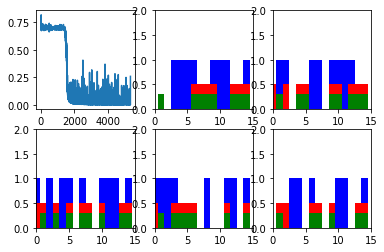

New data, epoch 82
Step 0 Loss 0.14332265


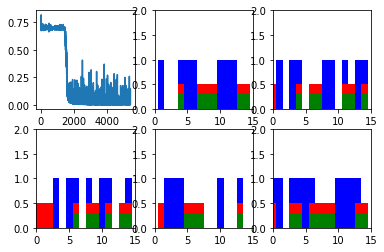

New data, epoch 83
Step 0 Loss 0.16962968


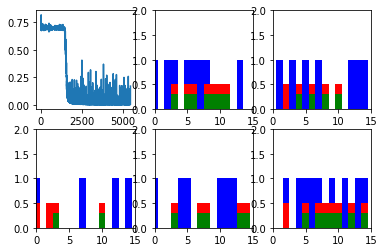

New data, epoch 84
Step 0 Loss 0.21866864


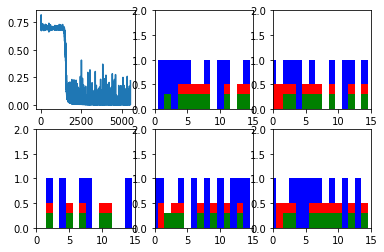

New data, epoch 85
Step 0 Loss 0.15477297


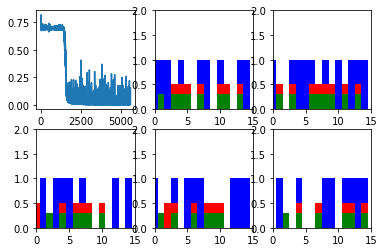

New data, epoch 86
Step 0 Loss 0.17227869


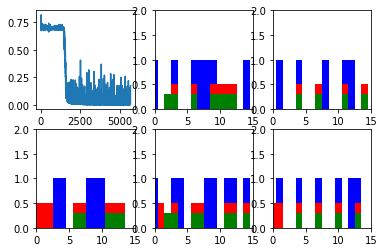

New data, epoch 87
Step 0 Loss 0.24975957


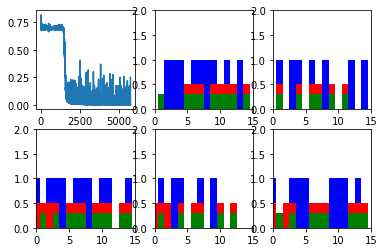

New data, epoch 88
Step 0 Loss 0.19877101


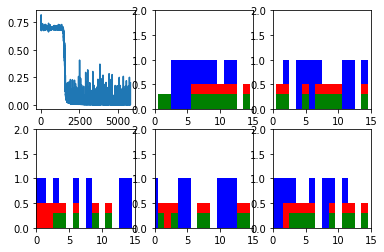

New data, epoch 89
Step 0 Loss 0.1799567


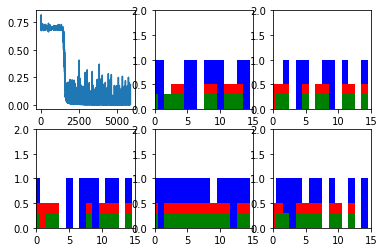

New data, epoch 90
Step 0 Loss 0.30354336


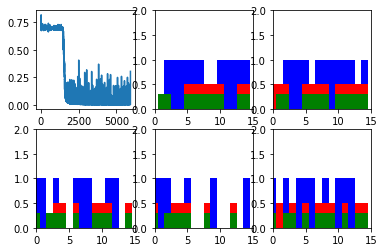

New data, epoch 91
Step 0 Loss 0.16529731


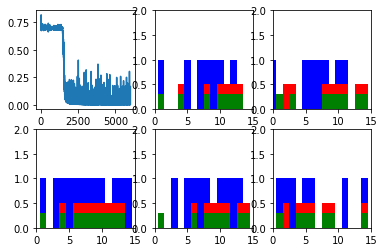

New data, epoch 92
Step 0 Loss 0.14395373


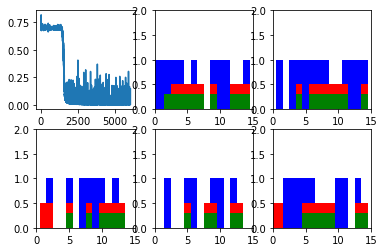

New data, epoch 93
Step 0 Loss 0.19545735


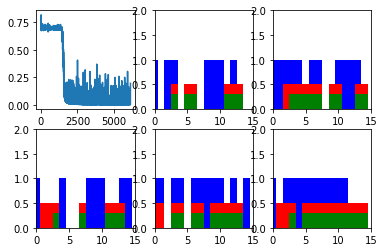

New data, epoch 94
Step 0 Loss 0.2743313


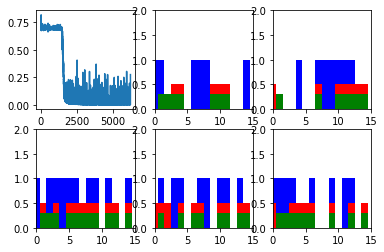

New data, epoch 95
Step 0 Loss 0.179107


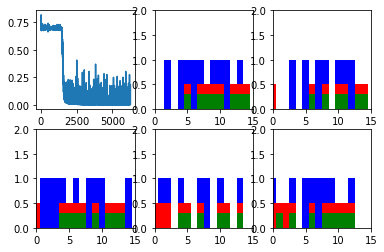

New data, epoch 96
Step 0 Loss 0.15233853


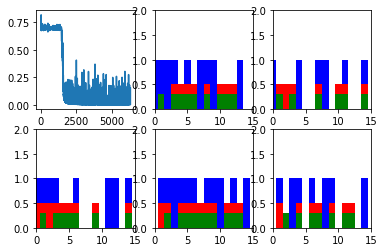

New data, epoch 97
Step 0 Loss 0.17072886


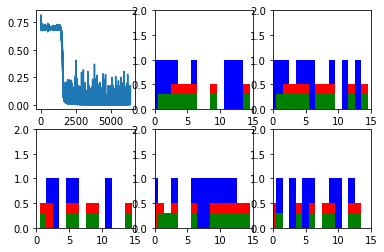

New data, epoch 98
Step 0 Loss 0.19982521


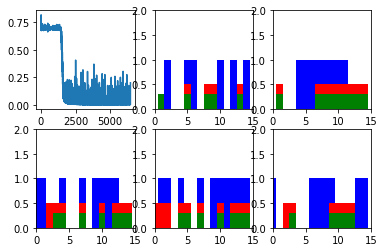

New data, epoch 99
Step 0 Loss 0.14804867


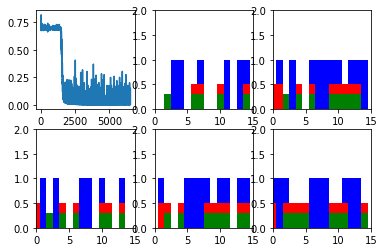

In [79]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder: batchX,
                    batchY_placeholder: batchY,
                    init_state: _current_state
                })

            loss_list.append(_total_loss)

            if batch_idx % 100 == 0:
                print("Step", batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()